In [1]:
import time
import math
import numbers

import numpy
import xgboost
from sklearn import model_selection
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn import preprocessing
import sklearn.tree

import pandas as pd

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

min_max_scaler = preprocessing.MinMaxScaler()

In [2]:
def prepareDS(src):
    result = pd.DataFrame()

    # dataset2['date'] = dataset['date']

    result['Level'] = src['Level']
    result['NextLevel1'] = src['Level'].shift(-1) - src['Level']
    result['NextLevel2'] = src['Level'].shift(-2) - src['Level']

    result['P1'] = src['P1']
    result['P2'] = src['P2']
    result['DP'] = src['P2'] - src['P1']

    result['T1'] = src['T1']
    result['T2'] = src['T2']

    result['S1'] = src['CL1']
    result['S2'] = src['CL2']

    result['RF1'] = src['Rainfall1'].map(lambda x: 0 if (isinstance(x, numbers.Number) and math.isnan(x)) else 1)
    result['RF2'] = src['Rainfall2'].map(lambda x: 0 if (isinstance(x, numbers.Number) and math.isnan(x)) else 1)

    result['W_N_1'] = src['W1'].map(
        lambda x: 1 if (not isinstance(x, numbers.Number) and x.startswith('С')) else 0)
    result['W_N_2'] = src['W2'].map(
        lambda x: 1 if (not isinstance(x, numbers.Number) and x.startswith('С')) else 0)
    result['W_S_1'] = src['W1'].map(
        lambda x: 1 if (not isinstance(x, numbers.Number) and x.startswith('Ю')) else 0)
    result['W_S_2'] = src['W2'].map(
        lambda x: 1 if (not isinstance(x, numbers.Number) and x.startswith('Ю')) else 0)
    result['W_E_1'] = src['W1'].map(lambda x: 1 if (not isinstance(x, numbers.Number) and (
            x.startswith('В') or x.startswith('СВ') or x.startswith('ЮВ'))) else 0)
    result['W_E_2'] = src['W2'].map(lambda x: 1 if (not isinstance(x, numbers.Number) and (
            x.startswith('В') or x.startswith('СВ') or x.startswith('ЮВ'))) else 0)
    result['W_W_1'] = src['W1'].map(lambda x: 1 if (not isinstance(x, numbers.Number) and (
            x.startswith('З') or x.startswith('СЗ') or x.startswith('ЮЗ'))) else 0)
    result['W_W_2'] = src['W2'].map(lambda x: 1 if (not isinstance(x, numbers.Number) and (
            x.startswith('З') or x.startswith('СЗ') or x.startswith('ЮЗ'))) else 0)

    result['Levelp'] = result['Level'].shift(1)
    result['T1p'] = result['T1'].shift(1)
    result['T2p'] = result['T2'].shift(1)
    result['P1p'] = result['P1'].shift(1)
    result['P2p'] = result['P2'].shift(1)
    result['S1p'] = result['S1'].shift(1)
    result['S2p'] = result['S2'].shift(1)
    result['RF1p'] = result['RF1'].shift(1)
    result['RF2p'] = result['RF2'].shift(1)

    # dataset2.drop(dataset2.tail(2).index,inplace=True)
    result = result.dropna()
    # dataset2 = dataset2.fillna(-100000)
    return result


In [11]:
dataset18 = prepareDS(pd.read_csv('khurzuk_18.csv', delimiter=";"))
dataset19 = prepareDS(pd.read_csv('khurzuk_19.csv', delimiter=";"))
dataset_all = dataset18.append(dataset19, ignore_index=True)

In [45]:
params = {'max_depth': range(1,40),'max_features': range(4,18)}
#scoring = 'neg_mean_squared_error'
scoring = None

In [46]:
model18 = GridSearchCV(xgboost.XGBRegressor(), params, scoring=scoring, cv=5, n_jobs=-1,verbose=True)
model18.fit(dataset18[['Level', 'T1', 'T2p', 'P1', 'P2p', 'S1', 'RF2p']].values, dataset18['NextLevel1'].values)

Fitting 5 folds for each of 546 candidates, totalling 2730 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 1032 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 2730 out of 2730 | elapsed:   30.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estima...
                                    objective='reg:squarederror',
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
         

In [47]:
model19 = GridSearchCV(xgboost.XGBRegressor(), params, scoring=scoring, cv=5, n_jobs=-1,verbose=True)
model19.fit(dataset19[['Level', 'T1', 'T2p', 'P1', 'P2p', 'S1', 'RF2p']].values, dataset19['NextLevel1'].values)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 546 candidates, totalling 2730 fits


[Parallel(n_jobs=-1)]: Done  60 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1208 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 2730 out of 2730 | elapsed:   29.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estima...
                                    objective='reg:squarederror',
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
         

In [48]:
model_all = GridSearchCV(xgboost.XGBRegressor(), params, scoring=scoring, cv=5, n_jobs=-1,verbose=True)
model_all.fit(dataset_all[['Level', 'T1', 'T2p', 'P1', 'P2p', 'S1', 'RF2p']].values, dataset_all['NextLevel1'].values)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 546 candidates, totalling 2730 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 696 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 946 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done 1296 tasks      | elapsed:   24.7s
[Parallel(n_jobs=-1)]: Done 1746 tasks      | elapsed:   37.8s
[Parallel(n_jobs=-1)]: Done 2296 tasks      | elapsed:   52.0s
[Parallel(n_jobs=-1)]: Done 2730 out of 2730 | elapsed:  1.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estima...
                                    objective='reg:squarederror',
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
         

In [49]:
pred_m18_d18 = model18.predict(dataset18[['Level', 'T1', 'T2p', 'P1', 'P2p', 'S1', 'RF2p']].values)
pred_m18_d19 = model18.predict(dataset19[['Level', 'T1', 'T2p', 'P1', 'P2p', 'S1', 'RF2p']].values)
pred_m18_d_all = model18.predict(dataset_all[['Level', 'T1', 'T2p', 'P1', 'P2p', 'S1', 'RF2p']].values)

pred_m19_d18 = model19.predict(dataset18[['Level', 'T1', 'T2p', 'P1', 'P2p', 'S1', 'RF2p']].values)
pred_m19_d19 = model19.predict(dataset19[['Level', 'T1', 'T2p', 'P1', 'P2p', 'S1', 'RF2p']].values)
pred_m19_d_all = model19.predict(dataset_all[['Level', 'T1', 'T2p', 'P1', 'P2p', 'S1', 'RF2p']].values)

pred_m_all_d18 = model_all.predict(dataset18[['Level', 'T1', 'T2p', 'P1', 'P2p', 'S1', 'RF2p']].values)
pred_m_all_d19 = model_all.predict(dataset19[['Level', 'T1', 'T2p', 'P1', 'P2p', 'S1', 'RF2p']].values)
pred_m_all_d_all = model_all.predict(dataset_all[['Level', 'T1', 'T2p', 'P1', 'P2p', 'S1', 'RF2p']].values)

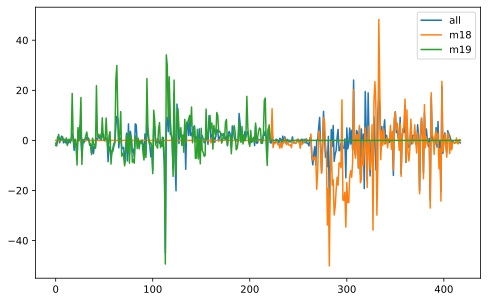

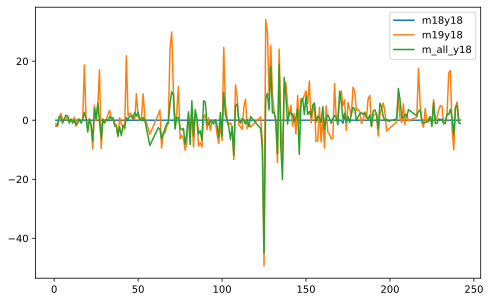

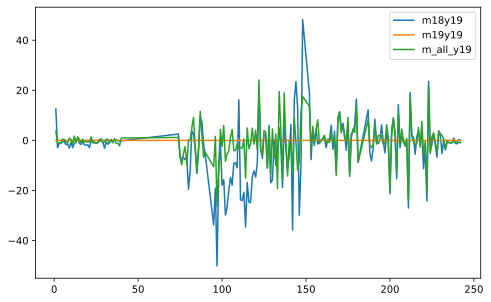

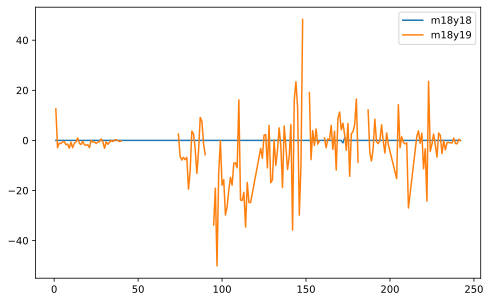

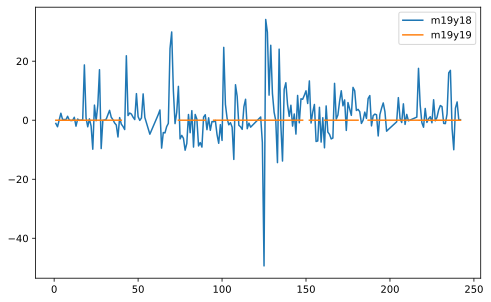

In [54]:
## use model_YY (fit on YY year) for data_YY

plotDs18 = pd.DataFrame();
plotDs18['m18y18'] = pred_m18_d18 - dataset18['NextLevel1']
plotDs18['m19y18'] = pred_m19_d18 - dataset18['NextLevel1']
plotDs18['m_all_y18'] = pred_m_all_d18 - dataset18['NextLevel1']

plotDs19 = pd.DataFrame();
plotDs19['m18y19'] = pred_m18_d19 - dataset19['NextLevel1']
plotDs19['m19y19'] = pred_m19_d19 - dataset19['NextLevel1']
plotDs19['m_all_y19'] = pred_m_all_d19 - dataset19['NextLevel1']

plotDsM18 = pd.DataFrame();
plotDsM18['m18y18'] = plotDs18['m18y18']
plotDsM18['m18y19'] = plotDs19['m18y19']

plotDsM19 = pd.DataFrame();
plotDsM19['m19y18'] = plotDs18['m19y18']
plotDsM19['m19y19'] = plotDs19['m19y19']

plotDsAll = pd.DataFrame();
plotDsAll['all'] = pred_m_all_d_all - dataset_all['NextLevel1']
plotDsAll['m18'] = pred_m18_d_all - dataset_all['NextLevel1']
plotDsAll['m19'] = pred_m19_d_all - dataset_all['NextLevel1']


plotDsAll.plot()
plotDs18.plot()
plotDs19.plot()
plotDsM18.plot()
plotDsM19.plot()

In [55]:
[
    #mean_squared_error(dataset18['NextLevel1'],pd.Series(pred_m18_d18)),
    mean_squared_error(dataset18['NextLevel1'],pd.Series(pred_m19_d18)),
    mean_squared_error(dataset18['NextLevel1'],pd.Series(pred_m_all_d18)),
    
    mean_squared_error(dataset19['NextLevel1'],pd.Series(pred_m18_d19)),
    #mean_squared_error(dataset19['NextLevel1'],pd.Series(pred_m19_d19)),
    mean_squared_error(dataset19['NextLevel1'],pd.Series(pred_m_all_d19)),
    
    mean_squared_error(dataset_all['NextLevel1'],pd.Series(pred_m18_d_all)),
    mean_squared_error(dataset_all['NextLevel1'],pd.Series(pred_m19_d_all)),
    mean_squared_error(dataset_all['NextLevel1'],pd.Series(pred_m_all_d_all)),
    
]

[68.8073735271379,
 29.109442354817084,
 140.08602915047234,
 52.10340415052237,
 65.35592327679264,
 36.70824122085712,
 39.83629056094754]